In [1]:
import os
import pandas as pd
import numpy as np
import random as rnd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from scipy.stats import boxcox
import datetime as dt

In [2]:
DATA_PATH ='C:\\Boot Camp\Homework\\final-project\\data\\Loan_status_2007-2020Q3.gzip'

In [3]:
loans = pd.read_csv(DATA_PATH)
loans.head()

C:\Users\narje\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,48,58,117,127,128,129,132,133,134,137) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [4]:
loans.count()

Unnamed: 0                                    2925493
id                                            2925493
loan_amnt                                     2925492
funded_amnt                                   2925492
funded_amnt_inv                               2925492
                                               ...   
hardship_loan_status                           143411
orig_projected_additional_accrued_interest     179240
hardship_payoff_balance_amount                 182076
hardship_last_payment_amount                   182076
debt_settlement_flag                          2925492
Length: 142, dtype: int64

In [5]:
#create sample data for first 500 rows just to check it
sample=loans.head(500)

In [6]:
sample.to_csv('C:\\Boot Camp\Homework\\final-project\\data\\sample_main_data.csv', index=False)

In [7]:
loans.columns

Index(['Unnamed: 0', 'id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date',
       'hardship_length', 'hardship_dpd', 'hardship_loan_status',
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag'],
      dtype='object', length=142)

In [8]:
#predict the loan_status variable. What are the value counts for this variable
loans["loan_status"].value_counts(dropna=False)

Fully Paid                                             1497783
Current                                                1031016
Charged Off                                             362548
Late (31-120 days)                                       16154
In Grace Period                                          10028
Late (16-30 days)                                         2719
Issued                                                    2062
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                    433
NaN                                                          1
Name: loan_status, dtype: int64

In [9]:
#keep the loans with status "Fully Paid" or "Charged Off"
ploans = loans.loc[loans['loan_status'].isin(['Fully Paid', 'Charged Off'])]


In [11]:
ploans.count()

Unnamed: 0                                    1860331
id                                            1860331
loan_amnt                                     1860331
funded_amnt                                   1860331
funded_amnt_inv                               1860331
                                               ...   
hardship_loan_status                            12684
orig_projected_additional_accrued_interest      19213
hardship_payoff_balance_amount                  22049
hardship_last_payment_amount                    22049
debt_settlement_flag                          1860331
Length: 142, dtype: int64

In [12]:
#Number of loan statuses with Fully paid or Charged off (we want to keep it as label of data for ML section)
ploans["loan_status"].value_counts(dropna=False)

Fully Paid     1497783
Charged Off     362548
Name: loan_status, dtype: int64

In [13]:
#percentage of each value
ploans["loan_status"].value_counts(normalize=True)

Fully Paid     0.805116
Charged Off    0.194884
Name: loan_status, dtype: float64

In [14]:
#calculate the percentage of missing data for each feature
missing_values_mean = ploans.isnull().mean().sort_values(ascending=False)

In [15]:
missing_values_mean.head(10)

next_pymnt_d               1.000000
hardship_loan_status       0.993182
deferral_term              0.993176
hardship_status            0.993176
hardship_dpd               0.993176
hardship_length            0.993176
payment_plan_start_date    0.993176
hardship_end_date          0.993176
hardship_start_date        0.993176
hardship_type              0.993176
dtype: float64

Text(0, 0.5, 'Feature count')

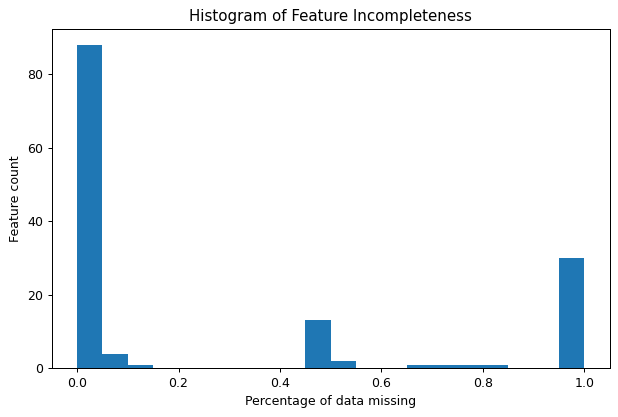

In [16]:
#visualize the distribution of missing data percentages
plt.figure(figsize=(8,5), dpi=90)
missing_values_mean.plot.hist(bins=20)
plt.title('Histogram of Feature Incompleteness')
plt.xlabel('Percentage of data missing')
plt.ylabel('Feature count')

In [17]:
# store all variables missing more than 30% data
drop_values_mean=sorted(list(missing_values_mean[missing_values_mean>0.3].index))
len(drop_values_mean)

49

In [18]:
drop_values_mean

['all_util',
 'annual_inc_joint',
 'deferral_term',
 'dti_joint',
 'hardship_amount',
 'hardship_dpd',
 'hardship_end_date',
 'hardship_last_payment_amount',
 'hardship_length',
 'hardship_loan_status',
 'hardship_payoff_balance_amount',
 'hardship_reason',
 'hardship_start_date',
 'hardship_status',
 'hardship_type',
 'il_util',
 'inq_fi',
 'inq_last_12m',
 'max_bal_bc',
 'mths_since_last_delinq',
 'mths_since_last_major_derog',
 'mths_since_last_record',
 'mths_since_rcnt_il',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_revol_delinq',
 'next_pymnt_d',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'open_rv_12m',
 'open_rv_24m',
 'orig_projected_additional_accrued_interest',
 'payment_plan_start_date',
 'revol_bal_joint',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_earliest_cr_line',
 'sec_app_fico_range_high',
 'sec_app_fico_range_low',
 'sec_app_inq_last_6mths',
 'sec_app_mort_acc',
 'sec_app_num_rev_accts',
 'sec_app_

In [19]:
# Drop features
ploans.drop(columns=drop_values_mean, inplace=True, axis=1)

C:\Users\narje\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
ploans.shape

(1860331, 93)

In [21]:
ploans.columns

Index(['Unnamed: 0', 'id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_pa

In [22]:
#keep needed features after checking Data Dictionary
keep_list=['loan_amnt','term','int_rate', 'installment', 'grade', 'sub_grade','emp_length', 'home_ownership', 'annual_inc','issue_d', 'loan_status','pymnt_plan','addr_state', 'dti', 'earliest_cr_line','fico_range_low', 'fico_range_high', 'open_acc', 'revol_bal', 'revol_util','total_acc','total_pymnt','total_rec_late_fee','last_pymnt_d','application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal','chargeoff_within_12_mths','mort_acc','num_il_tl','pub_rec_bankruptcies','tax_liens','tot_hi_cred_lim','total_bal_ex_mort','total_il_high_credit_limit', 'hardship_flag', 'debt_settlement_flag','pub_rec']

print("Keep features: ", len(keep_list))

Keep features:  39


In [23]:
ml_loans=ploans

In [24]:
drop_list = [col for col in ml_loans.columns if col not in keep_list]
drop_list

['Unnamed: 0',
 'id',
 'funded_amnt',
 'funded_amnt_inv',
 'emp_title',
 'verification_status',
 'url',
 'purpose',
 'title',
 'zip_code',
 'delinq_2yrs',
 'inq_last_6mths',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'policy_code',
 'total_rev_hi_lim',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mths_since_recent_bc',
 'mths_since_recent_inq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'perc

In [25]:
ml_loans.drop(labels=drop_list, axis=1, inplace=True)
ml_loans.shape

(1860331, 39)

In [26]:
#show float type with 2digits after point
pd.options.display.float_format = "{:.2f}".format

In [27]:
ml_loans['loan_amnt'].describe()
#Loan amounts range from $500 to $40000 and median of $12,000

count   1860331.00
mean      14588.27
std        8970.47
min         500.00
25%        7950.00
50%       12000.00
75%       20000.00
max       40000.00
Name: loan_amnt, dtype: float64

In [28]:
def plot_var(col_name, full_name, continuous):
    """
    Visualize a variable with and without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Plot without loan status
    if continuous:
        sns.distplot(loans.loc[loans[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(loans[col_name], order=sorted(loans[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

    # Plot with loan status
    if continuous:
        sns.boxplot(x=col_name, y='loan_status', data=loans, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        charge_off_rates = loans.groupby(col_name)['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged-off')
        ax2.set_title('Charge-off Rate by ' + full_name)
    ax2.set_xlabel(full_name)
    
    plt.tight_layout()

C:\Users\narje\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


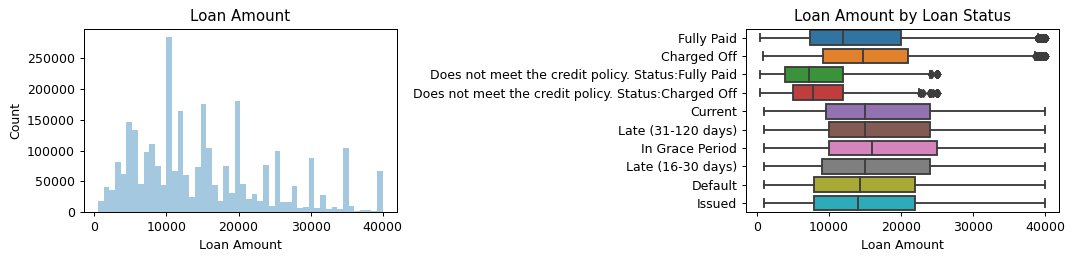

In [29]:
plot_var('loan_amnt', 'Loan Amount', continuous=True)

In [30]:
ml_loans.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,362548.00,15899.50,9083.26,900.00,9250.00,14700.00,21000.00,40000.00
Fully Paid,1497783.00,14270.88,8914.01,500.00,7350.00,12000.00,20000.00,40000.00


In [31]:
ml_loans.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'issue_d', 'loan_status',
       'pymnt_plan', 'addr_state', 'dti', 'earliest_cr_line', 'fico_range_low',
       'fico_range_high', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'total_rec_late_fee', 'last_pymnt_d',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'chargeoff_within_12_mths', 'mort_acc', 'num_il_tl',
       'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_il_high_credit_limit', 'hardship_flag',
       'debt_settlement_flag'],
      dtype='object')

In [32]:
ml_loans["loan_status"].head(10)

0     Fully Paid
1    Charged Off
2     Fully Paid
3     Fully Paid
4     Fully Paid
5     Fully Paid
6     Fully Paid
7     Fully Paid
8    Charged Off
9    Charged Off
Name: loan_status, dtype: object

In [33]:
#Finding the count and percentage of values that are missing in cleaned data frame
df_null = pd.DataFrame({'Count': ml_loans.isnull().sum(), 'Percent': 100*loans.isnull().sum()/len(ml_loans)})

In [34]:
#printing columns with null count more than 0
df_null[df_null['Count'] > 0] 

,Count,Percent
chargeoff_within_12_mths,56.00,0.01
dti,1108.00,0.17
emp_length,117196.00,11.03
hardship_flag,9354.00,2.07
last_pymnt_d,3289.00,0.26
mort_acc,47281.00,2.69
num_il_tl,67527.00,3.78
pub_rec_bankruptcies,697.00,0.07
revol_util,1398.00,0.14
tax_liens,39.00,0.01


In [35]:
#drop any columns where 80% or more data is missing
df1 = ml_loans.dropna(axis=1, thresh=int(0.80*len(ml_loans)))

In [37]:
#choose only data which is necessary for Machine learning process
df_LC=df1

<AxesSubplot:>

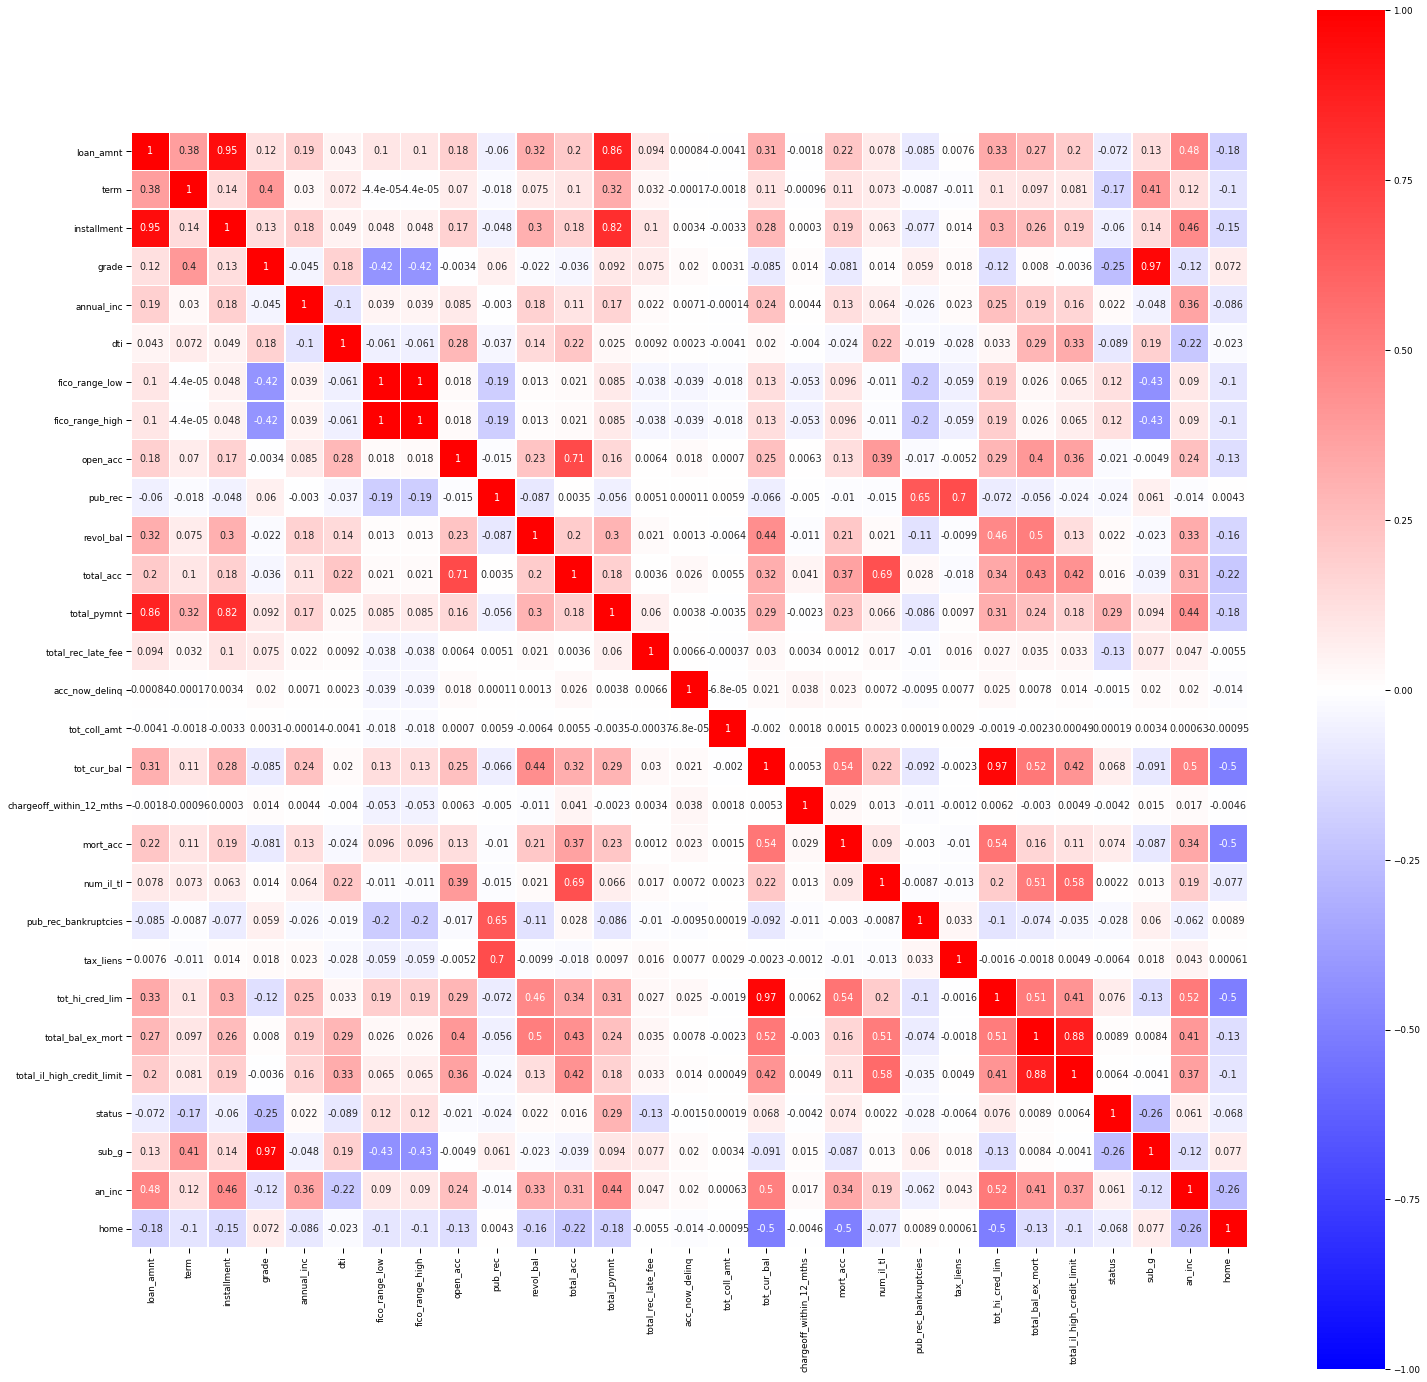

In [38]:
plt.figure(figsize=(25,25))
sns.set_context("paper", font_scale=1)
#finding the correllation matrix and changing the categorical data to category for the plot.
sns.heatmap(df_LC.assign(status=df_LC.loan_status.astype('category').cat.codes,
                         grade=df_LC.grade.astype('category').cat.codes,
                         sub_g=df_LC.sub_grade.astype('category').cat.codes,
                         term=df_LC.term.astype('category').cat.codes,
                        #emp_l=df_LC.emp_length.astype('category').cat.codes,
                         an_inc =df_LC.annual_inc.astype('category').cat.codes,
                        home=df_LC.home_ownership.astype('category').cat.codes,
                        dti=df_LC.dti.astype('category').cat.codes).corr(), 
                         annot=True, cmap='bwr',vmin=-1, vmax=1, square=True, linewidths=0.5)

In [190]:
#drop categories they don't provide any valuable info
df_LC = df1.filter(['loan_amnt','int_rate','emp_length','home_ownership','annual_inc','dti','loan_status','total_pymnt','fico_range_high'])

In [192]:
#printing the count and null values in the dataframe
dflc_null = pd.DataFrame({'Count': df_LC.isnull().sum(), 'Percent': 100*df_LC.isnull().sum()/len(df_LC)})
dflc_null[dflc_null['Count'] > 0]

,Count,Percent
emp_length,117196,6.30
dti,1108,0.06


In [194]:
# dropping the null rows since we have sufficient amount of data and there is no need to fill the null values.
df_LC.dropna()

,loan_amnt,int_rate,emp_length,home_ownership,annual_inc,dti,loan_status,total_pymnt,fico_range_high
0,5000.00,10.65%,10+ years,RENT,24000.00,27.65,Fully Paid,5863.16,739.00
1,2500.00,15.27%,< 1 year,RENT,30000.00,1.00,Charged Off,1014.53,744.00
2,2400.00,15.96%,10+ years,RENT,12252.00,8.72,Fully Paid,3005.67,739.00
3,10000.00,13.49%,10+ years,RENT,49200.00,20.00,Fully Paid,12231.89,694.00
4,3000.00,12.69%,1 year,RENT,80000.00,17.94,Fully Paid,4066.91,699.00
...,...,...,...,...,...,...,...,...,...
2925488,24000.00,23.99%,< 1 year,RENT,107000.00,11.65,Charged Off,7749.83,674.00
2925489,10000.00,7.99%,10+ years,MORTGAGE,65000.00,19.55,Fully Paid,11233.83,729.00
2925490,10050.00,16.99%,8 years,RENT,37000.00,20.56,Charged Off,9484.88,709.00
2925491,6000.00,11.44%,5 years,RENT,41000.00,19.99,Fully Paid,6917.54,674.00


In [195]:
#encode loan staus to 0 and 1
df_LC.loan_status=df_LC.loan_status.astype('category').cat.codes
df_LC.head()

,loan_amnt,int_rate,emp_length,home_ownership,annual_inc,dti,loan_status,total_pymnt,fico_range_high
0,5000.00,10.65%,10+ years,RENT,24000.00,27.65,1,5863.16,739.00
1,2500.00,15.27%,< 1 year,RENT,30000.00,1.00,0,1014.53,744.00
2,2400.00,15.96%,10+ years,RENT,12252.00,8.72,1,3005.67,739.00
3,10000.00,13.49%,10+ years,RENT,49200.00,20.00,1,12231.89,694.00
4,3000.00,12.69%,1 year,RENT,80000.00,17.94,1,4066.91,699.00


In [196]:
df_LC.dtypes

loan_amnt          float64
int_rate            object
emp_length          object
home_ownership      object
annual_inc         float64
dti                float64
loan_status           int8
total_pymnt        float64
fico_range_high    float64
dtype: object

In [197]:
#transform the data to account for any skewness in the variable distribution, using Box-cox transformation
numerical = df_LC.columns[df_LC.dtypes == 'float64']
for i in numerical:
    if df_LC[i].min() > 0:
        transformed, lamb = boxcox(df_LC.loc[ml_loans[i].notnull(), i])
        if np.abs(1 - lamb) > 0.02:
            df_LC.loc[ml_loans[i].notnull(), i] = transformed

In [198]:
df_LC["home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [199]:
df_LC['int_rate'] = df_LC['int_rate'].str.rstrip('%')
df_LC['int_rate'] = df_LC['int_rate'].astype(float)
df_LC.head()

,loan_amnt,int_rate,emp_length,home_ownership,annual_inc,dti,loan_status,total_pymnt,fico_range_high
0,51.08,10.65,10+ years,RENT,24000.00,27.65,1,5863.16,0.10
1,39.66,15.27,< 1 year,RENT,30000.00,1.00,0,1014.53,0.10
2,39.07,15.96,10+ years,RENT,12252.00,8.72,1,3005.67,0.10
3,65.55,13.49,10+ years,RENT,49200.00,20.00,1,12231.89,0.10
4,42.41,12.69,1 year,RENT,80000.00,17.94,1,4066.91,0.10


In [200]:
df_LC['emp_length'] = df_LC['emp_length'].str.rstrip('<+ years')
df_LC['emp_length'] = df_LC['emp_length'].str.replace('< 1', '1')
df_LC['emp_length'] = df_LC['emp_length'].astype(float)
df_LC.head()

,loan_amnt,int_rate,emp_length,home_ownership,annual_inc,dti,loan_status,total_pymnt,fico_range_high
0,51.08,10.65,10.00,RENT,24000.00,27.65,1,5863.16,0.10
1,39.66,15.27,1.00,RENT,30000.00,1.00,0,1014.53,0.10
2,39.07,15.96,10.00,RENT,12252.00,8.72,1,3005.67,0.10
3,65.55,13.49,10.00,RENT,49200.00,20.00,1,12231.89,0.10
4,42.41,12.69,1.00,RENT,80000.00,17.94,1,4066.91,0.10


In [201]:
df_LC.dtypes

loan_amnt          float64
int_rate           float64
emp_length         float64
home_ownership      object
annual_inc         float64
dti                float64
loan_status           int8
total_pymnt        float64
fico_range_high    float64
dtype: object

In [176]:
#categorical variables for the analysis and the machne learning algorithms doesn't take categorical and string variables directly, we have to creat dummy variables for them
# it would be wrong in our analysis since a lot of these variables have multiple categories. Just using weights can cause discrepencies in the algorithm. Instead, we will one hot encode these so that we have a 1 wherever that category turns up and 0 otherwise. This will also create seperate columns for each level of category. Also, we'll be dropping one of the categories so that we have N-1 columns instead of N.
df_ml = pd.get_dummies(df_LC, drop_first=True)

In [177]:
df_ml.count()

loan_amnt                  1860331
int_rate                   1860331
emp_length                 1743135
annual_inc                 1860331
dti                        1859223
loan_status                1860331
total_pymnt                1860331
fico_range_high            1860331
home_ownership_MORTGAGE    1860331
home_ownership_NONE        1860331
home_ownership_OTHER       1860331
home_ownership_OWN         1860331
home_ownership_RENT        1860331
dtype: int64

In [188]:
df_ml.dropna()

,loan_amnt,int_rate,emp_length,annual_inc,dti,loan_status,total_pymnt,fico_range_high,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,51.08,10.65,10.00,24000.00,27.65,1,5863.16,0.10,0,0,0,0,1
1,39.66,15.27,1.00,30000.00,1.00,0,1014.53,0.10,0,0,0,0,1
2,39.07,15.96,10.00,12252.00,8.72,1,3005.67,0.10,0,0,0,0,1
3,65.55,13.49,10.00,49200.00,20.00,1,12231.89,0.10,0,0,0,0,1
4,42.41,12.69,1.00,80000.00,17.94,1,4066.91,0.10,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925488,89.49,23.99,1.00,107000.00,11.65,0,7749.83,0.10,0,0,0,0,1
2925489,65.55,7.99,10.00,65000.00,19.55,1,11233.83,0.10,1,0,0,0,0
2925490,65.66,16.99,8.00,37000.00,20.56,0,9484.88,0.10,0,0,0,0,1
2925491,54.56,11.44,5.00,41000.00,19.99,1,6917.54,0.10,0,0,0,0,1


In [180]:
# Set features. This will also be used as your x values.
X = df_ml.drop("loan_status", axis=1)
y=df_ml["loan_status"]

In [181]:
#using 80% data for training and 20% for testing.
traindata, testdata = train_test_split(df_ml, stratify=df_ml['loan_status'],test_size=.3, random_state=17)
testdata.reset_index(drop=True, inplace=True)
traindata.reset_index(drop=True, inplace=True)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)

In [182]:
#Balancing the training dataset and creating a new model
y_default = traindata[traindata['loan_status'] == 0]
n_paid = traindata[traindata['loan_status'] == 1].sample(n=len(y_default), random_state=17) ##chosing equal amount of 1's

#creating a new dataframe for balanced set
data = y_default.append(n_paid) 

#creating the independent and dependent array
Xbal = data.drop('loan_status', axis=1)
ybal = data['loan_status']


In [183]:
# scaling data
sc = StandardScaler()
numerical = Xbal.columns[(Xbal.dtypes == 'float64') | (Xbal.dtypes == 'int64') | (Xbal.dtypes =='float32')].tolist()
Xbal[numerical] = sc.fit_transform(Xbal[numerical])


In [184]:
#creating the test set for the analysis and scaling it
Xte = testdata.drop('loan_status', axis=1)
yte = testdata['loan_status']
numericalt = Xte.columns[(Xte.dtypes == 'float64') | (Xte.dtypes == 'int64')| (Xte.dtypes =='float32')].tolist()
Xte[numericalt] = sc.fit_transform(Xte[numericalt])


In [185]:
#training model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

models = {'LDA': LinearDiscriminantAnalysis(),
          'MNB': MultinomialNB(),
          'RF': RandomForestClassifier(n_estimators=100),
          'LR': LogisticRegression(C=1)}

balset = {}
for i in models.keys():
    scores = cross_val_score(models[i], Xbal - np.min(Xbal) + 1,
                                    ybal, scoring='roc_auc', cv=3)
    balset[i] = scores
    print(i, scores, np.mean(scores))

C:\Users\narje\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\narje\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\narje\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 424, in fit
    X, y = self._validate_data(X, y, ensure_min_samples=2, estimator=self,
  File "C:\Users\narje\anaconda3\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\narje\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "C:\Users\narje\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 795, in check_X_y
    X = check_array(X, accept_sp

In [186]:
#try to find the optimal number of trees using the gridsearchcv
#Xte = testdata.drop('loan_status', axis=1)
model = RandomForestClassifier(n_estimators=100)
model.fit(Xbal, ybal)
#predict = model.predict(Xte)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [161]:
df_LC.dtypes

loan_amnt             float64
int_rate              float64
emp_length            float64
home_ownership         object
annual_inc            float64
dti                   float64
loan_status              int8
total_pymnt           float64
total_rec_late_fee    float64
dtype: object

In [153]:
df_LC["home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [142]:
df_LC['int_rate'] = df_LC['int_rate'].str.rstrip('%')
df_LC['int_rate'] = df_LC['int_rate'].astype(float)
df_LC.head()

,loan_amnt,int_rate,emp_length,home_ownership,annual_inc,dti,loan_status,total_pymnt,total_rec_late_fee
0,51.08,10.65,10+ years,RENT,24000.00,27.65,1,5863.16,0.00
1,39.66,15.27,< 1 year,RENT,30000.00,1.00,0,1014.53,0.00
2,39.07,15.96,10+ years,RENT,12252.00,8.72,1,3005.67,0.00
3,65.55,13.49,10+ years,RENT,49200.00,20.00,1,12231.89,16.97
4,42.41,12.69,1 year,RENT,80000.00,17.94,1,4066.91,0.00


In [154]:
df_LC.dtypes

loan_amnt             float64
int_rate              float64
emp_length            float64
home_ownership         object
annual_inc            float64
dti                   float64
loan_status              int8
total_pymnt           float64
total_rec_late_fee    float64
dtype: object

In [152]:
df_LC['emp_length'] = df_LC['emp_length'].str.rstrip('<+ years')
df_LC['emp_length'] = df_LC['emp_length'].str.replace('< 1', '1')
df_LC['emp_length'] = df_LC['emp_length'].astype(float)
df_LC.head()

,loan_amnt,int_rate,emp_length,home_ownership,annual_inc,dti,loan_status,total_pymnt,total_rec_late_fee
0,51.08,10.65,11.00,RENT,24000.00,27.65,1,5863.16,0.00
1,39.66,15.27,1.00,RENT,30000.00,1.00,0,1014.53,0.00
2,39.07,15.96,11.00,RENT,12252.00,8.72,1,3005.67,0.00
3,65.55,13.49,11.00,RENT,49200.00,20.00,1,12231.89,16.97
4,42.41,12.69,1.00,RENT,80000.00,17.94,1,4066.91,0.00


In [156]:
df_LC.to_csv('data\\ML_data.csv', index=False)

In [162]:
df_ml = pd.get_dummies(df_LC, drop_first=True)

In [164]:
df_ml.count()

loan_amnt                  1860331
int_rate                   1860331
emp_length                 1743135
annual_inc                 1860331
dti                        1859223
loan_status                1860331
total_pymnt                1860331
total_rec_late_fee         1860331
home_ownership_MORTGAGE    1860331
home_ownership_NONE        1860331
home_ownership_OTHER       1860331
home_ownership_OWN         1860331
home_ownership_RENT        1860331
dtype: int64

In [157]:
# Set features. This will also be used as your x values.
X = df_LC.drop("loan_status", axis=1)

In [158]:
y=df_LC["loan_status"]
print(X.shape, y.shape)

(1860331, 8) (1860331,)


In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [160]:
#scale data
X_scaler = MinMaxScaler().fit(X_train)

ValueError: could not convert string to float: 'OWN'

In [79]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [81]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [82]:
y_test_categorical

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)